In [0]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

TensorFlow 2.x selected.


'2.0.0'

#Autoencoders in Tensorflow

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('/content/drive/My Drive/Colab Notebooks')
from datasets import MNISTDataset

4423680/4422102 [==============================] - 0s 0us/step


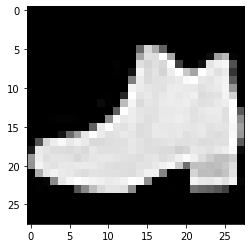

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
plt.imshow(train_images[15], cmap='Greys_r')
data = MNISTDataset(train_images.reshape([-1, 784]), train_labels,
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size = 128)

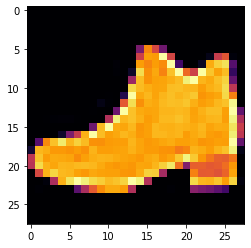

In [0]:
plt.imshow(train_images[15], cmap='inferno');

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
num_inputs=784    #28x28 pixels
num_hid1=392
num_hid2=196
num_hid3=num_hid1
num_output=num_inputs
lr=0.01
actf=tf.nn.relu
num_epoch=5
batch_size=128
num_test_images=10
num_batches=train_images.shape[0]//batch_size

In [0]:
initializer=tf.keras.initializers.VarianceScaling()


w1=tf.Variable(initializer([num_inputs,num_hid1]),dtype=tf.float32)
w2=tf.Variable(initializer([num_hid1,num_hid2]),dtype=tf.float32)
w3=tf.Variable(initializer([num_hid2,num_hid3]),dtype=tf.float32)
w4=tf.Variable(initializer([num_hid3,num_output]),dtype=tf.float32)

b1=tf.Variable(tf.zeros(num_hid1))
b2=tf.Variable(tf.zeros(num_hid2))
b3=tf.Variable(tf.zeros(num_hid3))
b4=tf.Variable(tf.zeros(num_output))

In [0]:
var_list = [w1, w2, w3, w4, b1, b2, b3, b4]

In [0]:
losses = []
accs = []
import statistics
for step in range(num_batches*num_epoch):
  img_batch, lbl_batch = data.next_batch()
  with tf.GradientTape() as tape:
    layer_1 = actf(tf.matmul(img_batch, w1) + b1)
    layer_2 = actf(tf.matmul(layer_1, w2) + b2)
    layer_3 = actf(tf.matmul(layer_2, w3) + b3)
    output_layer = actf(tf.matmul(layer_3, w4) + b4)
    xent = tf.reduce_mean(tf.square(output_layer-img_batch))
  grads = tape.gradient(xent, var_list)
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
  optimizer.apply_gradients(zip(grads,var_list))
  if not step % 50:
    #preds = tf.argmax(output_layer, axis=1, output_type=tf.int32)
    acc = np.max(tf.reduce_mean(tf.cast(tf.equal(output_layer, img_batch),
                                  tf.float32), 0))
    losses.append(xent)
    accs.append(acc)
    print('Loss: {} Accuracy: {}'.format(xent, acc))

Loss: 0.16973070800304413 Accuracy: 1.0
Loss: 0.1322236955165863 Accuracy: 0.9921875
Loss: 0.08103738725185394 Accuracy: 1.0
Loss: 0.09020812809467316 Accuracy: 1.0
Loss: 0.07456273585557938 Accuracy: 1.0
Loss: 0.06210959330201149 Accuracy: 1.0
Loss: 0.10039564222097397 Accuracy: 1.0
Loss: 0.07919536530971527 Accuracy: 1.0
Loss: 0.06938701868057251 Accuracy: 1.0
Loss: 0.09273836761713028 Accuracy: 1.0
Starting new epoch...
Loss: 0.06673742830753326 Accuracy: 1.0
Loss: 0.05284341424703598 Accuracy: 1.0
Loss: 0.04591871425509453 Accuracy: 1.0
Loss: 0.06660725176334381 Accuracy: 1.0
Loss: 0.07451321929693222 Accuracy: 1.0
Loss: 0.09945488721132278 Accuracy: 1.0
Loss: 0.06148461997509003 Accuracy: 1.0
Loss: 0.054459571838378906 Accuracy: 1.0
Loss: 0.05793730169534683 Accuracy: 1.0
Starting new epoch...
Loss: 0.06883405148983002 Accuracy: 1.0
Loss: 0.0716312974691391 Accuracy: 1.0
Loss: 0.06039050966501236 Accuracy: 1.0
Loss: 0.08481056988239288 Accuracy: 1.0
Loss: 0.06422130018472672 Accur

In [0]:
tf.reduce_mean(tf.cast(tf.equal([1,2,3],[1,3,5]), tf.float32))

<tf.Tensor: id=655526, shape=(), dtype=float32, numpy=0.33333334>

In [0]:
data.next_batch()[0].shape

(128, 784)

In [0]:
data.test_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Starting new epoch...


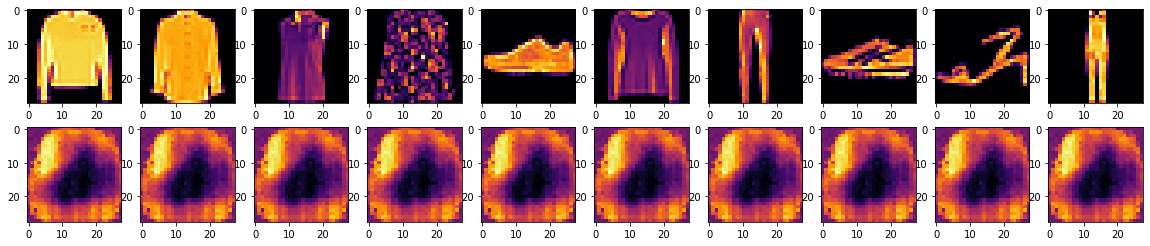

In [0]:
f,a=plt.subplots(2,10,figsize=(20,4))
for i in range(num_test_images):
  test_layer_1 = tf.add(tf.matmul(data.next_batch()[0], w1), b1)
  test_layer_2 = tf.add(tf.matmul(test_layer_1,w2), b2)
  test_layer_3 = tf.add(tf.matmul(test_layer_2, w3), b3)
  test_out = tf.matmul(test_layer_3, w4) + b4
  a[0][i].imshow(np.reshape(data.next_batch()[0][i],(28,28)), cmap='inferno')
  a[1][i].imshow(np.reshape(test_out[i],(28,28)), cmap='inferno')



# Convolutional Autoencoders

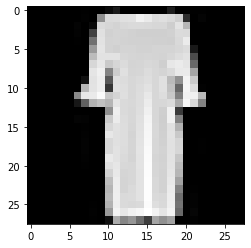

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
plt.imshow(train_images[94], cmap='Greys_r');

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
train_images = train_images.reshape(-1,28,28,1)
test_images  = test_images.reshape(-1,28,28,1)
train_images.shape

(60000, 28, 28, 1)

In [0]:
train_images.dtype

dtype('uint8')

In [0]:
train_images = train_images/255
test_images = test_images/255

In [0]:
train_images.dtype

dtype('float64')

In [0]:
train_images = train_images.astype(np.float32)
test_images = test_images.astype(np.float32)

In [0]:
train_images.dtype

dtype('float32')

In [0]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_ground,valid_ground = train_test_split(train_images,
                                                             train_images,
                                                             test_size=0.2,
                                                             random_state=42)

In [0]:
batch_size = 128
epochs = 200
inChannel = 1
x, y = 28, 28
input_img = tf.keras.layers.Input(shape = (x, y, inChannel))
num_classes = 10

In [0]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import UpSampling2D

In [0]:
def encoder(input_img):

  #input: 28*28*1
  conv1 = Conv2D(32,(3,3), activation='relu', padding='same')(input_img) #28*28*32
  conv1 = BatchNormalization()(conv1)
  conv1 = Conv2D(32, (3,3), activation='relu', padding='same')(conv1)
  conv1 = BatchNormalization()(conv1)
  pool1 = MaxPool2D(pool_size=(2,2))(conv1)#14*14*32
  conv2 = Conv2D(64, (3,3), activation='relu', padding='same')(pool1)#14*14*64
  conv2 = BatchNormalization()(conv2)
  conv2 = Conv2D(64, (3,3), activation='relu', padding='same')(conv2)
  conv2 = BatchNormalization()(conv2)
  pool2 = MaxPool2D(pool_size=(2,2))(conv2)#7*7*64
  conv3 = Conv2D(128, (3,3), activation='relu', padding='same')(pool2)#7*7*128
  conv3 = BatchNormalization()(conv3)
  conv3 = Conv2D(128, (3,3), activation='relu', padding='same')(conv3)
  conv3 = BatchNormalization()(conv3)
  conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)#7*7*256
  conv4 = BatchNormalization()(conv4)
  conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
  encoded = BatchNormalization()(conv4)

  return encoded

In [0]:
def decoder(encoded):

  conv5 = Conv2D(128, (3,3), activation='relu', padding='same')(encoded)#7*7*128
  conv5 = BatchNormalization()(conv5)
  conv5 = Conv2D(128, (3,3), activation='relu', padding='same')(conv5)
  conv5 = BatchNormalization()(conv5)
  up1 = UpSampling2D((2,2))(conv5)#14*14*128
  conv6 = Conv2D(64, (3,3), activation='relu', padding='same')(up1)#14*14*64
  conv6 = BatchNormalization()(conv6)
  conv6 = Conv2D(64, (3,3), activation='relu', padding='same')(conv6)
  conv6 = BatchNormalization()(conv6)
  up2 = UpSampling2D((2,2))(conv6)#28*28*64
  conv7 = Conv2D(32, (3,3), activation='relu', padding='same')(up2)#28*28*32
  conv7 = BatchNormalization()(conv7)
  conv7 = Conv2D(32, (3,3), activation='relu', padding='same')(conv7)
  conv7 = BatchNormalization()(conv7)
  decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(conv7)#28*28*1

  return decoded

In [0]:
autoencoder = tf.keras.Model(input_img, decoder(encoder(input_img)))
autoencoder.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001))
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496 

In [0]:
earlystop_callback = tf.keras.callbacks.EarlyStopping(
  monitor='val_loss', min_delta=0.001,
  patience=5)
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    period=5)
autoencoder.save_weights(checkpoint_path.format(epoch=0))

In [0]:
autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(valid_X, valid_ground), use_multiprocessing=True, callbacks=[earlystop_callback, cp_callback])

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 17s 362us/sample - loss: 0.0246 - val_loss: 0.0229
Epoch 2/200
48000/48000 [==============================] - 11s 227us/sample - loss: 0.0093 - val_loss: 0.0115
Epoch 3/200
48000/48000 [==============================] - 11s 233us/sample - loss: 0.0068 - val_loss: 0.0087
Epoch 4/200
48000/48000 [==============================] - 11s 236us/sample - loss: 0.0055 - val_loss: 0.0068
Epoch 5/200
47744/48000 [============================>.] - ETA: 0s - loss: 0.0047
Epoch 00005: saving model to training_2/cp-0005.ckpt
48000/48000 [==============================] - 12s 242us/sample - loss: 0.0047 - val_loss: 0.0052
Epoch 6/200
48000/48000 [==============================] - 11s 237us/sample - loss: 0.0042 - val_loss: 0.0056
Epoch 7/200
48000/48000 [==============================] - 11s 236us/sample - loss: 0.0040 - val_loss: 0.0039
Epoch 8/200
48000/48000 [==============================] 

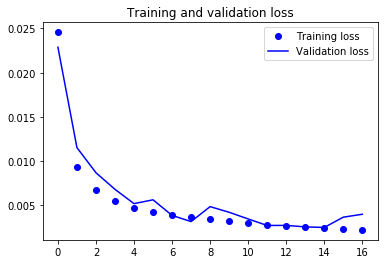

In [0]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(17)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
autoencoder.save_weights('autoencoder.h5')

In [0]:
train_y_one_hot = tf.keras.utils.to_categorical(train_labels)
test_y_one_hot = tf.keras.utils.to_categorical(test_labels)
print('Original label:', train_labels[0])
print('After conversion to one-hot:', train_y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [0]:
train_X, valid_X, train_label, valid_label = train_test_split(train_images, train_y_one_hot, test_size=0.2, random_state =42)

In [0]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [0]:
def classifier(encoder):
  flat = tf.keras.layers.Flatten()(encoder)
  dense = tf.keras.layers.Dense(128, activation='relu')(flat)
  output = tf.keras.layers.Dense(10, activation='softmax')(dense)
  return output

In [0]:
full_model = tf.keras.Model(input_img, classifier(encoder(input_img)))
full_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_14 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_15 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 64)        1849

In [0]:
for l1, l2 in zip(full_model.layers[:19], autoencoder.layers[:19]):
  l1.set_weights(l2.get_weights())

In [0]:
autoencoder.get_weights()[0][1]

array([[[-0.05577348, -0.10240553, -0.09659852, -0.1499719 ,
         -0.10426863, -0.02127098,  0.04702003,  0.26282513,
         -0.08381062,  0.08043855,  0.21900518,  0.17290774,
         -0.10331271, -0.16997449, -0.16763806,  0.14632782,
          0.091447  ,  0.13719478, -0.01104592, -0.16368861,
         -0.0759581 , -0.07427561,  0.03438068,  0.07329029,
          0.24440393, -0.19582458,  0.11837205, -0.1399517 ,
         -0.19600886, -0.23573712,  0.26670155,  0.07164657]],

       [[-0.03314157,  0.17254037, -0.13442223, -0.14828995,
         -0.08122984,  0.10871153, -0.1816084 ,  0.16593692,
         -0.00074772,  0.0780149 , -0.10352901,  0.17093763,
         -0.0523723 , -0.04546723,  0.1737024 ,  0.10905728,
         -0.07001639, -0.10520458, -0.1787321 , -0.19391802,
         -0.10475504, -0.13470343,  0.20507056, -0.02399815,
          0.1222737 , -0.10143912,  0.09067205, -0.09189558,
         -0.0288685 , -0.2266957 , -0.08261821,  0.10866864]],

       [[-0.126928

In [0]:
full_model.get_weights()[0][1]

array([[[-0.05577348, -0.10240553, -0.09659852, -0.1499719 ,
         -0.10426863, -0.02127098,  0.04702003,  0.26282513,
         -0.08381062,  0.08043855,  0.21900518,  0.17290774,
         -0.10331271, -0.16997449, -0.16763806,  0.14632782,
          0.091447  ,  0.13719478, -0.01104592, -0.16368861,
         -0.0759581 , -0.07427561,  0.03438068,  0.07329029,
          0.24440393, -0.19582458,  0.11837205, -0.1399517 ,
         -0.19600886, -0.23573712,  0.26670155,  0.07164657]],

       [[-0.03314157,  0.17254037, -0.13442223, -0.14828995,
         -0.08122984,  0.10871153, -0.1816084 ,  0.16593692,
         -0.00074772,  0.0780149 , -0.10352901,  0.17093763,
         -0.0523723 , -0.04546723,  0.1737024 ,  0.10905728,
         -0.07001639, -0.10520458, -0.1787321 , -0.19391802,
         -0.10475504, -0.13470343,  0.20507056, -0.02399815,
          0.1222737 , -0.10143912,  0.09067205, -0.09189558,
         -0.0288685 , -0.2266957 , -0.08261821,  0.10866864]],

       [[-0.126928

In [0]:
for layer in full_model.layers[:19]:
  layer.trainable = False

In [0]:
full_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_14 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_15 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 64)        1849

In [0]:
full_model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [0]:
earlystop_acc_callback = tf.keras.callbacks.EarlyStopping(
  monitor='val_accuracy', min_delta=0.0001,
  patience=5)
checkpoint_path = "training_classify/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    period=5)
full_model.save_weights(checkpoint_path.format(epoch=0))

In [0]:
classify_train = full_model.fit(train_X, train_label, batch_size=batch_size, epochs=200, verbose=1, validation_data=(valid_X, valid_label), use_multiprocessing=True, callbacks=[earlystop_acc_callback, cp_callback] )

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 6s 125us/sample - loss: 0.4076 - accuracy: 0.8653 - val_loss: 0.3151 - val_accuracy: 0.8846
Epoch 2/200
48000/48000 [==============================] - 4s 88us/sample - loss: 0.2336 - accuracy: 0.9131 - val_loss: 0.2758 - val_accuracy: 0.9032
Epoch 3/200
48000/48000 [==============================] - 4s 88us/sample - loss: 0.1834 - accuracy: 0.9317 - val_loss: 0.3005 - val_accuracy: 0.8985
Epoch 4/200
48000/48000 [==============================] - 4s 87us/sample - loss: 0.1551 - accuracy: 0.9411 - val_loss: 0.2819 - val_accuracy: 0.9060
Epoch 5/200
47488/48000 [============================>.] - ETA: 0s - loss: 0.1296 - accuracy: 0.9516
Epoch 00005: saving model to training_classify/cp-0005.ckpt
48000/48000 [==============================] - 4s 90us/sample - loss: 0.1296 - accuracy: 0.9516 - val_loss: 0.3070 - val_accuracy: 0.9007
Epoch 6/200
48000/48000 [=========================

In [0]:
full_model.save_weights('autoencoder_classification.h5')

In [0]:
test_eval = full_model.evaluate(test_images, test_y_one_hot, verbose=0)

In [0]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.4845144014339894
Test accuracy: 0.901


In [0]:
predicted_classes = full_model.predict(test_images)

In [0]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [0]:
predicted_classes.shape, test_labels.shape

((10000,), (10000,))

Found 9002 correct labels


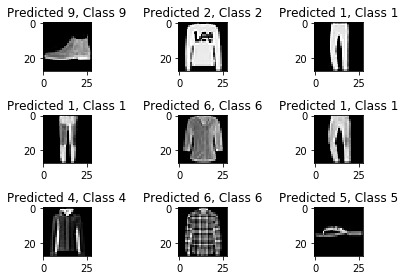

In [0]:
correct = np.where(predicted_classes==test_labels)[0]
print ("Found {} correct labels".format(len(correct)))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_images[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_labels[correct]))
    plt.tight_layout()

Found 998 correct labels


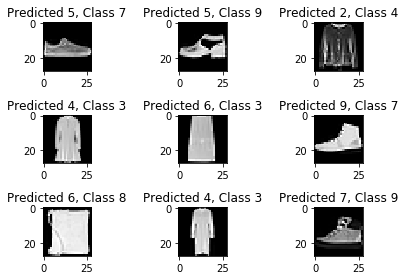

In [0]:
incorrect = np.where(predicted_classes!=test_labels)[0]
print ("Found {} correct labels".format(len(incorrect)))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_images[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_labels[incorrect]))
    plt.tight_layout()

In [0]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_labels,  , target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.84      0.83      0.84      1000
     Class 1       0.98      0.98      0.98      1000
     Class 2       0.86      0.86      0.86      1000
     Class 3       0.89      0.88      0.89      1000
     Class 4       0.82      0.87      0.84      1000
     Class 5       0.98      0.97      0.97      1000
     Class 6       0.74      0.72      0.73      1000
     Class 7       0.96      0.96      0.96      1000
     Class 8       0.98      0.97      0.97      1000
     Class 9       0.96      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



# Unsupervised Pretraining

In [0]:
x_100 = []
y_100 = []
for i in range(100):
  index = np.random.randint(1,60001)
  x_100.append(train_images[index])
  y_100.append(train_labels[index])
x_100 = np.asarray(x_100)
y_100 = np.asarray(y_100)


In [0]:
x_100.shape

(100, 28, 28, 1)

In [0]:
y_100[10]

0

Text(0.5, 1.0, '0')

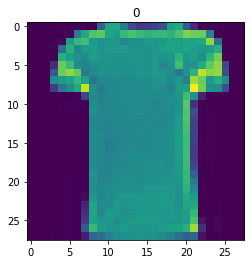

In [0]:
plt.imshow(x_100[10][:,:,-1]);
plt.title(y_100[10])

In [0]:
y_100_one_hot = tf.keras.utils.to_categorical(y_100)
print('Original label:', y_100[10])
print('After conversion to one-hot:', y_100_one_hot[10])

Original label: 0
After conversion to one-hot: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
print('Original label:', y_100[0])
print('After conversion to one-hot:', y_100_one_hot[0])

Original label: 5
After conversion to one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
train_X, valid_X, train_label, valid_label = train_test_split(x_100, y_100_one_hot, test_size=0.2, random_state =42)

In [0]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((80, 28, 28, 1), (20, 28, 28, 1), (80, 10), (20, 10))

In [0]:
full_model_100 = tf.keras.Model(input_img, classifier(encoder(input_img)))
full_model_100.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_14 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_15 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 64)        1849

In [0]:
for l1, l2 in zip(full_model_100.layers[:19], autoencoder.layers[:19]):
  l1.set_weights(l2.get_weights())

In [0]:
autoencoder.get_weights()[0][1]

array([[[ 0.04833078, -0.15483446, -0.14417179,  0.06251215,
          0.11159409, -0.09248102,  0.08613814, -0.14351667,
         -0.0704376 , -0.22070388,  0.00126335, -0.19129649,
         -0.11122917,  0.15460157,  0.1769649 , -0.0757566 ,
         -0.0213549 , -0.08987148, -0.08517823, -0.00665311,
          0.07313575,  0.13902144,  0.1476051 , -0.26708484,
          0.10219434, -0.06447496, -0.11948302, -0.0767829 ,
          0.15720981, -0.04569827, -0.12224747,  0.16496058]],

       [[ 0.08498206,  0.15945816, -0.10573611,  0.08375151,
          0.01000481, -0.02491541,  0.26487067, -0.00853189,
          0.19857024, -0.18248236, -0.09711066, -0.33645344,
         -0.11392328,  0.2271518 ,  0.20419791, -0.05882332,
         -0.1968524 ,  0.15867296, -0.00728969, -0.07573808,
          0.04325111, -0.00043735,  0.14861935,  0.01673077,
         -0.13927291,  0.08392757, -0.1567714 , -0.1256459 ,
          0.09913367, -0.1593194 ,  0.04062937, -0.06227977]],

       [[ 0.203215

In [0]:
full_model_100.get_weights()[0][1]

array([[[ 0.04833078, -0.15483446, -0.14417179,  0.06251215,
          0.11159409, -0.09248102,  0.08613814, -0.14351667,
         -0.0704376 , -0.22070388,  0.00126335, -0.19129649,
         -0.11122917,  0.15460157,  0.1769649 , -0.0757566 ,
         -0.0213549 , -0.08987148, -0.08517823, -0.00665311,
          0.07313575,  0.13902144,  0.1476051 , -0.26708484,
          0.10219434, -0.06447496, -0.11948302, -0.0767829 ,
          0.15720981, -0.04569827, -0.12224747,  0.16496058]],

       [[ 0.08498206,  0.15945816, -0.10573611,  0.08375151,
          0.01000481, -0.02491541,  0.26487067, -0.00853189,
          0.19857024, -0.18248236, -0.09711066, -0.33645344,
         -0.11392328,  0.2271518 ,  0.20419791, -0.05882332,
         -0.1968524 ,  0.15867296, -0.00728969, -0.07573808,
          0.04325111, -0.00043735,  0.14861935,  0.01673077,
         -0.13927291,  0.08392757, -0.1567714 , -0.1256459 ,
          0.09913367, -0.1593194 ,  0.04062937, -0.06227977]],

       [[ 0.203215

In [0]:
for layer in full_model_100.layers[:19]:
  layer.trainable = False

In [0]:
full_model_100.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_14 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_15 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 64)        1849

In [0]:
full_model_100.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [0]:
earlystop_acc_callback = tf.keras.callbacks.EarlyStopping(
  monitor='val_accuracy', min_delta=0.0001,
  patience=5)
checkpoint_path = "training_classify/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    period=5)
full_model_100.save_weights(checkpoint_path.format(epoch=0))

In [0]:
classify_100_train = full_model_100.fit(train_X, train_label, batch_size=batch_size, epochs=200, verbose=1, validation_data=(valid_X, valid_label), use_multiprocessing=True, callbacks=[cp_callback] )

Train on 80 samples, validate on 20 samples
Epoch 1/200
80/80 [==============================] - 0s 310us/sample - loss: 0.0022 - accuracy: 1.0000 - val_loss: 3.0895 - val_accuracy: 0.6500
Epoch 2/200

Epoch 00002: saving model to training_classify/cp-0002.ckpt
80/80 [==============================] - 0s 2ms/sample - loss: 0.0012 - accuracy: 1.0000 - val_loss: 3.2103 - val_accuracy: 0.6500
Epoch 3/200
80/80 [==============================] - 0s 309us/sample - loss: 6.9817e-04 - accuracy: 1.0000 - val_loss: 3.3201 - val_accuracy: 0.6500
Epoch 4/200
80/80 [==============================] - 0s 328us/sample - loss: 5.1608e-04 - accuracy: 1.0000 - val_loss: 3.4192 - val_accuracy: 0.6500
Epoch 5/200
80/80 [==============================] - 0s 303us/sample - loss: 4.3706e-04 - accuracy: 1.0000 - val_loss: 3.5080 - val_accuracy: 0.6500
Epoch 6/200
80/80 [==============================] - 0s 262us/sample - loss: 3.8919e-04 - accuracy: 1.0000 - val_loss: 3.5868 - val_accuracy: 0.6500
Epoch 7/200

In [0]:
full_model_100.save_weights('autoencoder_100_classification.h5')